In [2]:
import numpy as np
import pandas as pd

poke = pd.read_csv('pokemon.csv')
poke


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [9]:
import datetime as dt 
dt?

In [17]:
import datetime as dt
import matplotlib.pyplot as plt
births = pd.read_csv('births.csv')


a = births['year']

a = (a//10)*10

births['decade'] = a
births.dropna(inplace=True)
births['day'] = births['day'].astype(int)
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['date'] = pd.to_datetime(10000 * births.year +100 * births.month +births.day, format='%Y%m%d')

births.pivot_table()

,year,month,day,gender,births,decade,date
0,1969,1,1,F,4046,1960,1969-01-01
1,1969,1,1,M,4440,1960,1969-01-01
2,1969,1,2,F,4454,1960,1969-01-02
3,1969,1,2,M,4548,1960,1969-01-02
4,1969,1,3,F,4548,1960,1969-01-03
...,...,...,...,...,...,...,...
15062,1988,12,29,M,5944,1980,1988-12-29
15063,1988,12,30,F,5742,1980,1988-12-30
15064,1988,12,30,M,6095,1980,1988-12-30
15065,1988,12,31,F,4435,1980,1988-12-31


/var/folders/13/hcygwrbj4gqb7zdx2sxzyz5m0000gn/T/ipykernel_90345/437455634.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)for (month, day) in births_by_date.index]


<IPython.core.display.Javascript object>


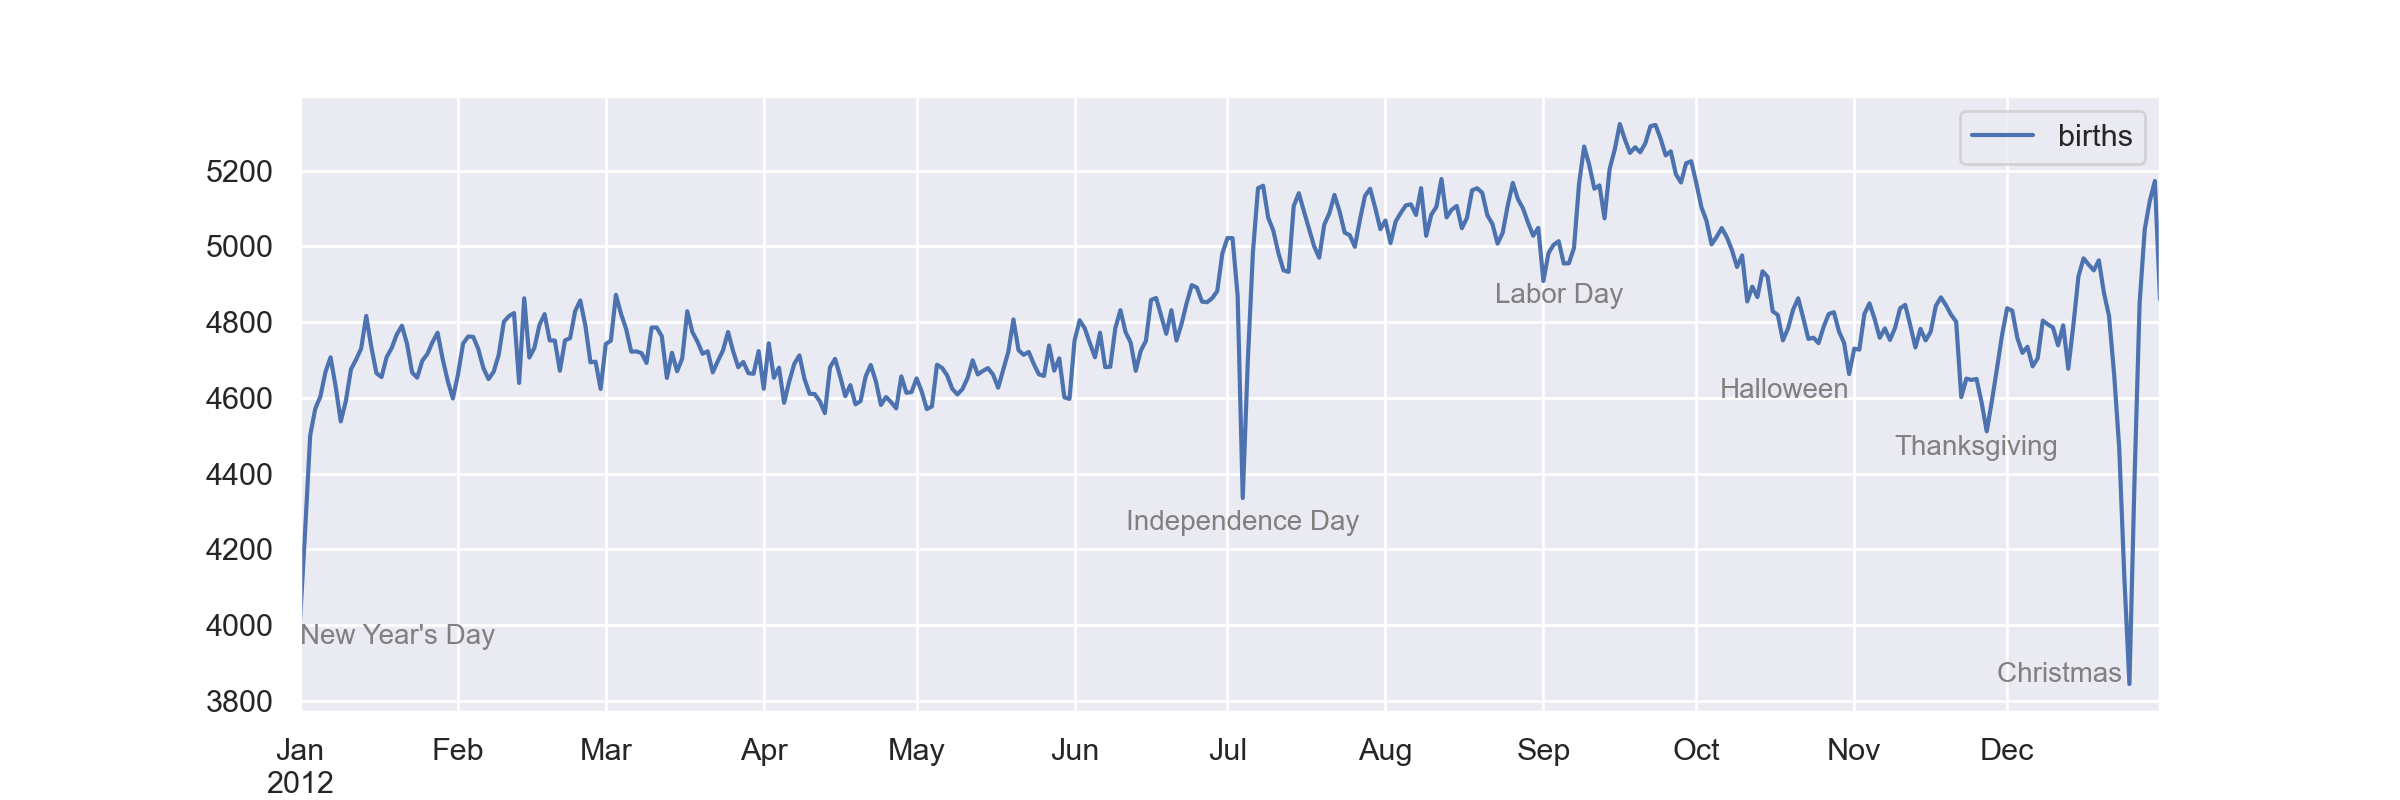

Text(2012-12-25, 3850, 'Christmas ')

In [92]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day']=births['day'].astype(int)
births['date'] = pd.to_datetime(10000 * births.year +100 * births.month +births.day, format='%Y%m%d')


births_by_date = births.pivot_table('births',[births.month, births.day])
births_by_date.index = [pd.datetime(2012, month, day)for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4)) 
births_by_date.plot(ax=ax);

style = dict(size=10, color='gray')
ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)


<IPython.core.display.Javascript object>


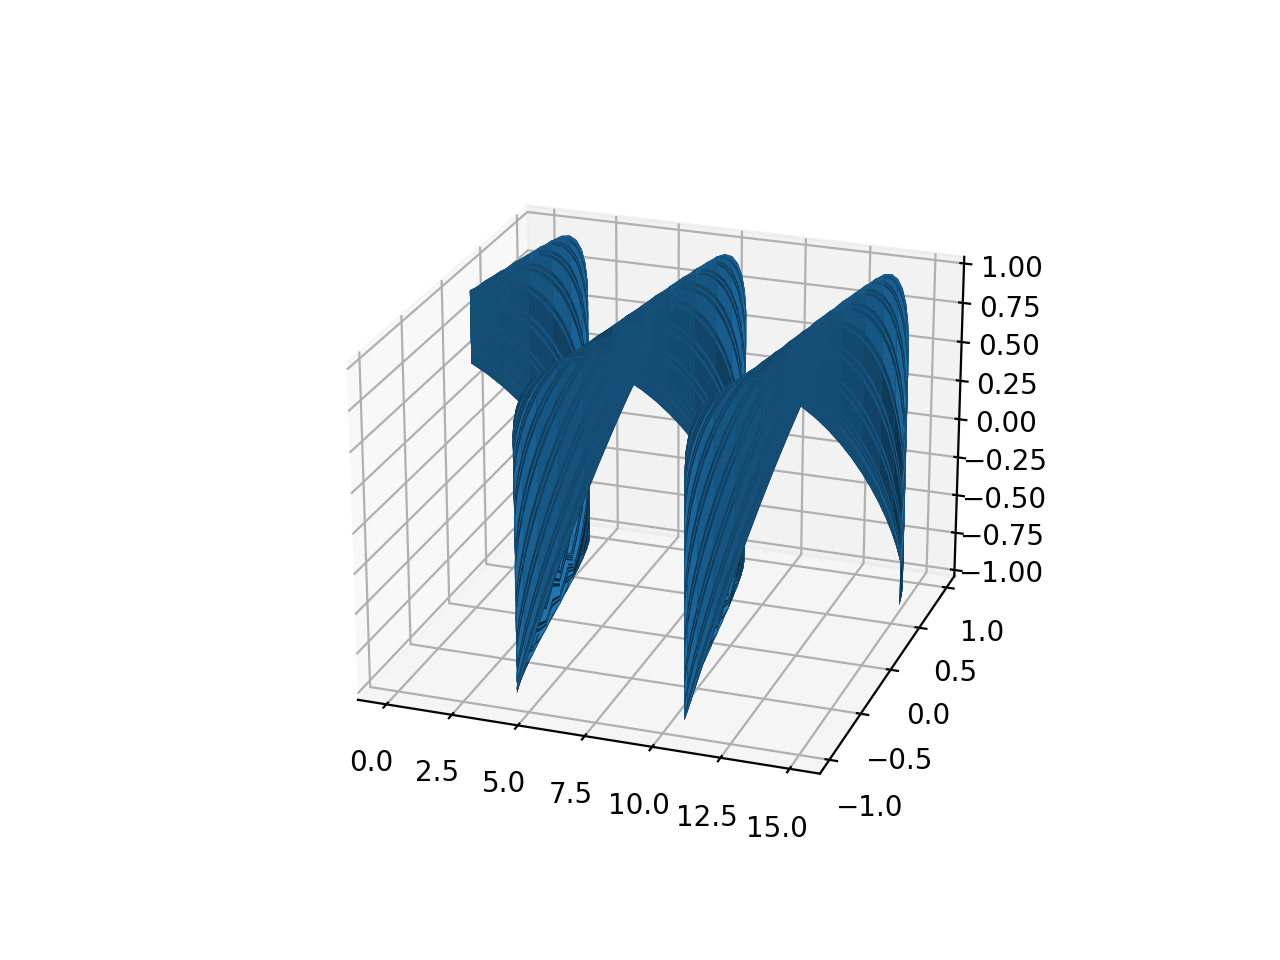

In [55]:
ax = plt.axes(projection='3d')
# Data for a three-dimensional line

x = np.linspace(0, 15, 100)
y = np.sin(x)

z = np.cos(x+y[:,np.newaxis])
ax.plot_surface(x, y, z)

<IPython.core.display.Javascript object>


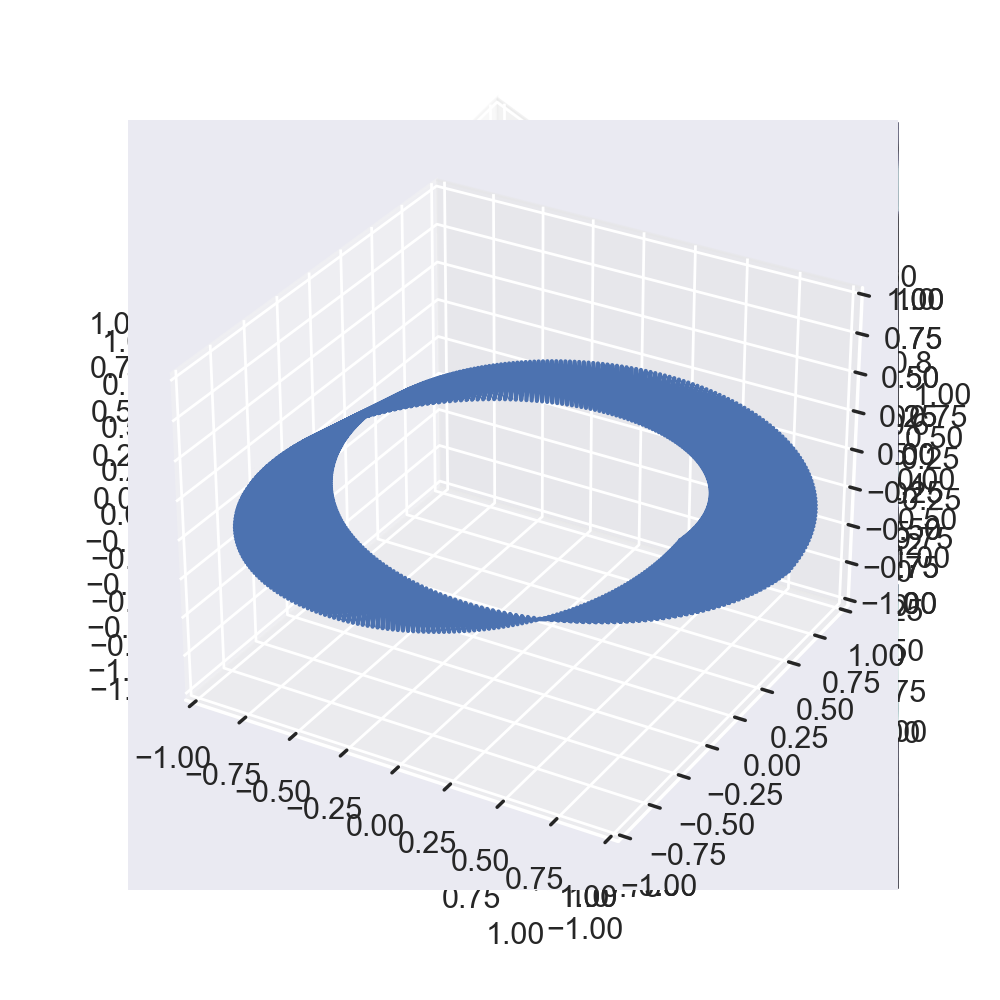

In [77]:

import seaborn as sns 
sns.set()
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)
           
from sklearn.datasets import fetch_olivetti_faces 
faces = fetch_olivetti_faces().images
for i in range(5): 
    for j in range(5):
            ax[i, j].xaxis.set_major_locator(plt.NullLocator())
            ax[i, j].yaxis.set_major_locator(plt.NullLocator())
            ax[i, j].imshow(faces[i], cmap="bone")

In [69]:
r = np.linspace(0, 6, 20)
theta = np.linspace(0, np.pi, 40)
r, theta = np.meshgrid(r, theta)
X = r * np.sin(theta) 
Y = r * np.cos(theta) 
Z=np.sin(np.sqrt(X ** 2 + Y ** 2))

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                            cmap='viridis', edgecolor='none');

In [85]:
theta = np.linspace(0, 2 * np.pi, 300)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

phi = 0.5 * theta

r=1+w*np.cos(theta)
            
x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))
tri = Triangulation(np.ravel(w), np.ravel(theta))
            
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z);
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1);